<a href="https://colab.research.google.com/github/jclauss24/MLTSA25_JClauss/blob/main/labs/3_11_inclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from matplotlib import pylab as plt

In [6]:
dfgrouped = pd.read_csv("https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/refs/heads/main/data/bitcoin_volume.csv",
                        index_col=0)


In [7]:
dfgrouped.head()

,Volume
Date,
2012-01-01,10.000000
2012-01-02,10.100000
2012-01-03,107.085281
2012-01-04,107.233260
2012-01-05,70.328742


In [8]:
dfgrouped.tail()

,Volume
Date,
2014-12-29,5317.387194
2014-12-30,7673.202917
2014-12-31,7567.614615
2015-01-01,4791.695273
2015-01-02,1651.384036


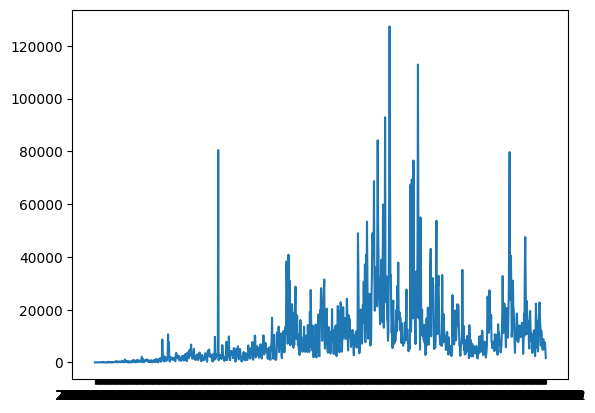

In [9]:
plt.plot(dfgrouped.index,dfgrouped["Volume"])

In [12]:
# convert the strings to a datetime object
dfgrouped.index = pd.to_datetime(dfgrouped.index)

(array([15340., 15461., 15584., 15706., 15826., 15949., 16071., 16191.,
        16314., 16436.]),
 [Text(15340.0, 0, '2012-01'),
  Text(15461.0, 0, '2012-05'),
  Text(15584.0, 0, '2012-09'),
  Text(15706.0, 0, '2013-01'),
  Text(15826.0, 0, '2013-05'),
  Text(15949.0, 0, '2013-09'),
  Text(16071.0, 0, '2014-01'),
  Text(16191.0, 0, '2014-05'),
  Text(16314.0, 0, '2014-09'),
  Text(16436.0, 0, '2015-01')])

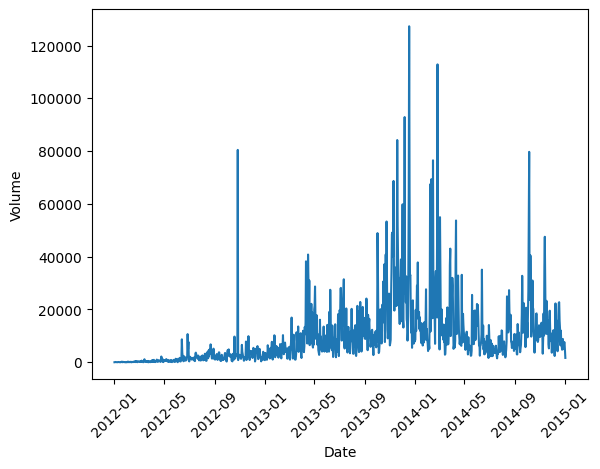

In [14]:
plt.plot(dfgrouped.index,dfgrouped["Volume"])
plt.xlabel("Date")
plt.ylabel("Volume")
plt.xticks(rotation=45)

In [18]:
dfshort = dfgrouped.iloc[200:500]

(array([15553., 15584., 15614., 15645., 15675., 15706., 15737., 15765.,
        15796., 15826.]),
 [Text(15553.0, 0, '2012-08'),
  Text(15584.0, 0, '2012-09'),
  Text(15614.0, 0, '2012-10'),
  Text(15645.0, 0, '2012-11'),
  Text(15675.0, 0, '2012-12'),
  Text(15706.0, 0, '2013-01'),
  Text(15737.0, 0, '2013-02'),
  Text(15765.0, 0, '2013-03'),
  Text(15796.0, 0, '2013-04'),
  Text(15826.0, 0, '2013-05')])

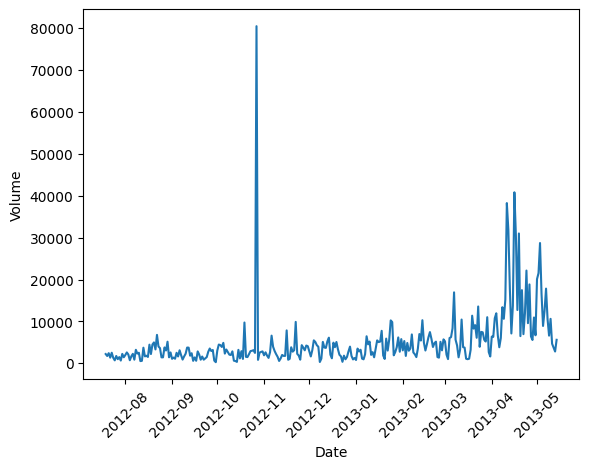

In [19]:
plt.plot(dfshort.index,dfshort["Volume"])
plt.xlabel("Date")
plt.ylabel("Volume")
plt.xticks(rotation=45)

In [39]:
rollingobject = dfshort.rolling(window=20, center = True)

AttributeError: 'Rolling' object has no attribute 'head'

,0
Volume,3983.83677


In [41]:
m = rollingobject.mean() # need to make these rolling average and standard dev
s = rollingobject.std()

In [42]:
m.head(20)

,Volume
Date,
2012-07-19,NaN
2012-07-20,NaN
2012-07-21,NaN
2012-07-22,NaN
2012-07-23,NaN
2012-07-24,NaN
2012-07-25,NaN
2012-07-26,NaN
2012-07-27,NaN


<Axes: xlabel='Date'>

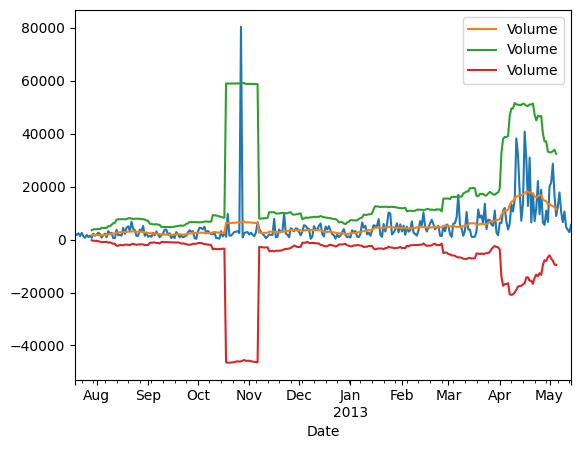

In [45]:
ax = dfshort["Volume"].plot()
m.plot(ax=ax)
(m + 3*s).plot(ax = ax)
(m-3*s).plot(ax = ax)


In [44]:
import numpy as np

In [48]:
np.where((dfshort["Volume"]<(m["Volume"]-3*s["Volume"]))
+ (dfshort["Volume"]>(m["Volume"]+3*s["Volume"])))

(array([100, 231]),)

In [53]:
m1 = dfshort['Volume'].rolling(window=21,center=True).apply(lambda x: np.mean(np.concatenate([[x[:10],x[11:]]])))
std1 = dfshort['Volume'].rolling(window=21,center=True).apply(lambda x: np.std(np.concatenate([[x[:10],x[11:]]])))

<Axes: xlabel='Date'>

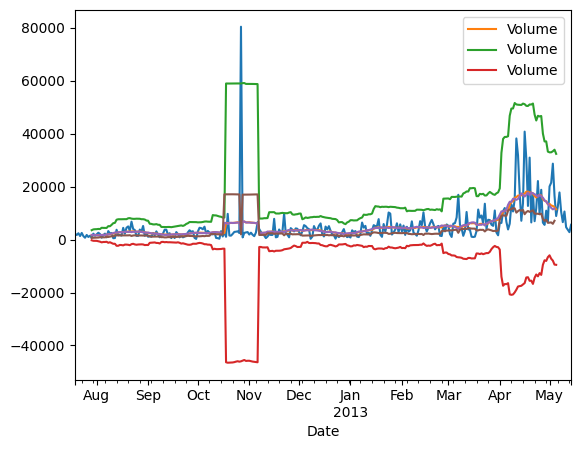

In [54]:
ax = dfshort["Volume"].plot()
m.plot(ax=ax)
(m + 3*s).plot(ax = ax)
(m-3*s).plot(ax = ax)
m1.plot(ax = ax)
std1.plot(ax = ax)